In [1]:
#import des fichiers et load des ressources
import functions
import pandas as pd
data = pd.read_csv('cleaned_data.csv')
pd.options.display.max_columns = data.shape[1]

In [2]:
#initialisation des valeurs explicatives et dépendantes
X = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)'] + list(data.filter(regex='^(LargestPropertyUseType_|Neighborhood_)').columns)
y = 'SiteEnergyUseWN(kBtu)'

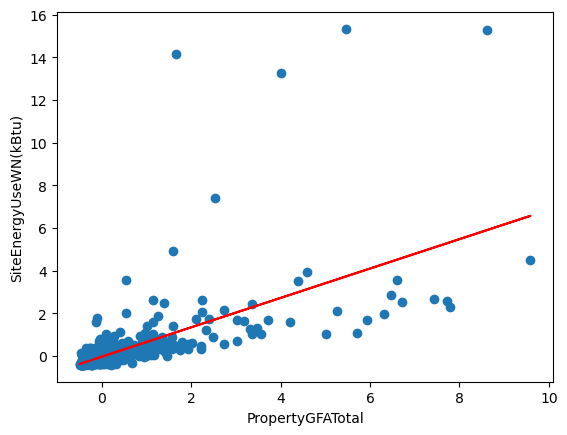

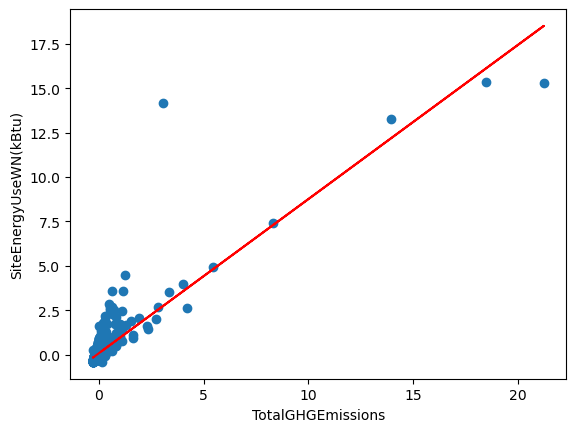

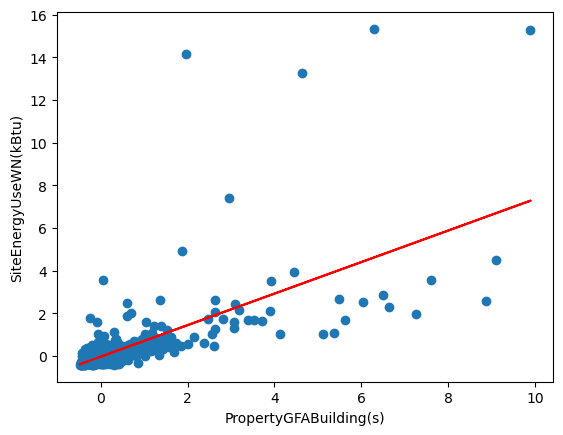

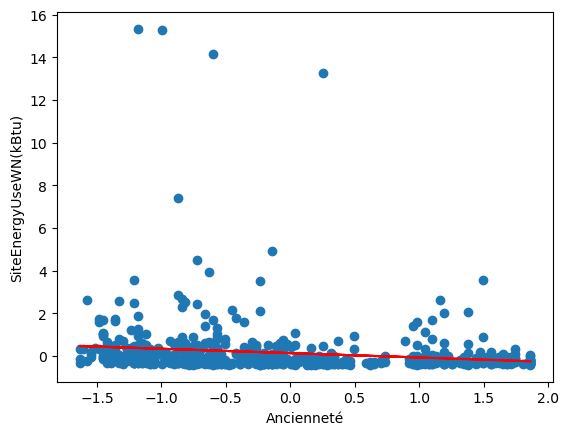

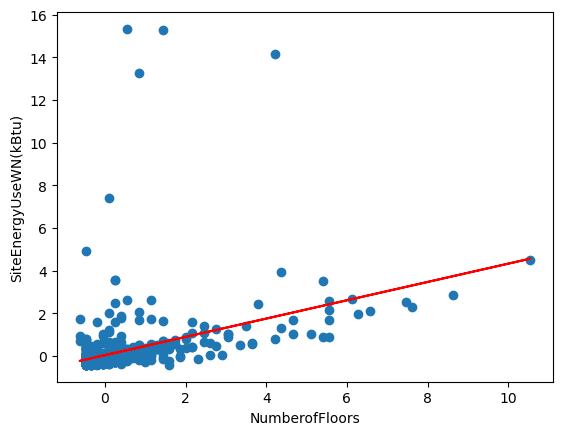

In [3]:
# quelques analyses bivariées
functions.showScatterPlot(data,'PropertyGFATotal',y)
functions.showScatterPlot(data,'TotalGHGEmissions',y)
functions.showScatterPlot(data,'PropertyGFABuilding(s)',y)
functions.showScatterPlot(data,'Ancienneté',y)
functions.showScatterPlot(data,'NumberofFloors',y)

In [4]:
#dummy_regressor
functions.dummy_regressor_model(data,X,y)

Prédiction moyenne :  [0.15394588 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588
 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588
 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588
 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588
 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588
 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588
 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588
 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588
 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588
 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588
 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588
 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588
 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588
 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588 0.15394588
 0.15394588 0.15394588 0.15394588 0.1539

In [5]:
# Données d'entraînement et test

X_train, X_test, y_train, y_test = functions.train_test_split_data(data,X,y)

In [6]:
mse_tree_list = []
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range(100):
    best_depth, grid_results = functions.show_grid_analysis(X_train, y_train, max_depth)
    tree, mse  = functions.evaluate_model(X_train, X_test, y_train, y_test, best_depth)
    mse_tree_list.append(mse)

average_mse_tree = sum(mse_tree_list) / len(mse_tree_list)
print("Average MSE:", average_mse_tree)

Average MSE: 2.01055089702589


In [7]:
mse_lin_list = []

for i in range(100):
    lin_reg, mse_lin = functions.linear_regression(X_train, X_test, y_train, y_test)
    mse_lin_list.append(mse_lin)

average_mse_lin = sum(mse_lin_list) / len(mse_lin_list)
print("Average MSE:", average_mse_lin)


TypeError: cannot unpack non-iterable numpy.float64 object